### Performing Final Data Cleaning and EDA on laptops data
Goal - To performa EDA to get more insights to data so that we know : 
- What factors affect prices 
- How we can impute missing values while feature Engineering


In [201]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [202]:
df = pd.read_excel('final_cleaned_laptops.xlsx')


In [203]:
df

,Unnamed: 0,name,brand_name,model_name,processor_brand,processor_model,processor_generation,price,ram_size,ram_type,...,hdd_size_gb,display_size,processor,ram,operating_sys,memory,display,warranty,touchscreen,graphics_size
0,0,ASUS ROG ZEPHYRUS DUO 16 RYZEN 9 16 CORE 7945H...,ASUS,ROG,AMD,RYZEN9,NaN,479990,32,DDR5,...,0,40.64,AMD RYZEN 9 16 CORE PROCESSOR,32 GB DDR5 RAM,Windows 11,2048 GB SSD,40.64 cm (16 Inch) Display,1.0,0,16.0
1,1,ASUS ROG ZEPHYRUS DUO 16 RYZEN 9 16 CORE 7945H...,ASUS,ROG,AMD,RYZEN9,NaN,455990,32,DDR5,...,0,40.64,AMD RYZEN 9 16 CORE PROCESSOR,32 GB DDR5 RAM,Windows 11,2048 GB SSD,40.64 cm (16 Inch) Display,1.0,0,12.0
2,2,MSI CORE I9 13TH GEN - (32 GB/2 TB SSD/WINDOWS...,MSI,X,INTEL,COREI9,13.0,399990,32,DDR5,...,0,43.18,INTEL CORE I9 PROCESSOR (13TH GEN),32 GB DDR5 RAM,Windows 11,2048 GB SSD,43.18 cm (17 Inch) Display,2.0,0,12.0
3,3,ASUS ROG STRIX SCAR 17 SE (2022) WITH 90WHR BA...,ASUS,ROG,INTEL,COREI9,12.0,399990,32,DDR5,...,0,43.94,INTEL CORE I9 PROCESSOR (12TH GEN),32 GB DDR5 RAM,Windows 11,4096 GB SSD,43.94 cm (17.3 inch) Display,1.0,0,NaN
4,4,ASUS ROG ZEPHYRUS DUO 16 (2022) DUAL SCREEN LA...,ASUS,ROG,AMD,RYZEN9,NaN,361990,32,DDR5,...,0,40.64,AMD RYZEN 9 OCTA CORE PROCESSOR,32 GB DDR5 RAM,Windows 11,2048 GB SSD,40.64 cm (16 Inch) Display,1.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527,1527,SAMSUNG CORE I5 12TH GEN - (8 GB/512 GB SSD/WI...,SAMSUNG,X,INTEL,COREI5,12.0,59990,8,DDR4,...,0,39.62,INTEL CORE I5 PROCESSOR (12TH GEN),8 GB DDR4 RAM,Windows 11,512 GB SSD,39.62 cm (15.6 Inch) Display,1.0,0,NaN
1528,1528,ASUS VIVOBOOK GO 15 OLED (2023) RYZEN 5 QUAD C...,ASUS,VIVOBOOK,AMD,RYZEN5,NaN,59990,8,LPDDR5,...,0,39.62,AMD RYZEN 5 QUAD CORE PROCESSOR,8 GB LPDDR5 RAM,Windows 11,512 GB SSD,39.62 cm (15.6 Inch) Display,1.0,0,NaN
1529,1529,ASUS VIVOBOOK 16 (2023) RYZEN 5 HEXA CORE 7530...,ASUS,VIVOBOOK,AMD,RYZEN5,NaN,59990,8,DDR4,...,0,40.64,AMD RYZEN 5 HEXA CORE PROCESSOR,8 GB DDR4 RAM,Windows 11,1024 GB SSD,40.64 cm (16 Inch) Display,1.0,0,NaN
1530,1530,DELL CORE I5 11TH GEN - (8 GB/1 TB HDD/256 GB ...,DELL,X,INTEL,COREI5,11.0,59990,8,DDR4,...,1024,39.62,INTEL CORE I5 PROCESSOR (11TH GEN),8 GB DDR4 RAM,Windows 11,1024 GB HDD|256 GB SSD,39.62 cm (15.6 inch) Display,1.0,0,NaN


- We Will Drop the initial columns that we had as we have properly made sepearate columns from them 

In [204]:
df.columns

Index(['Unnamed: 0', 'name', 'brand_name', 'model_name', 'processor_brand',
       'processor_model', 'processor_generation', 'price', 'ram_size',
       'ram_type', 'ssd_size_gb', 'hdd_size_gb', 'display_size', 'processor',
       'ram', 'operating_sys', 'memory', 'display', 'warranty', 'touchscreen',
       'graphics_size'],
      dtype='object')

In [205]:
df = df.drop(['Unnamed: 0', 'name','processor','ram','memory','display'],axis = 1)

In [206]:
df

,brand_name,model_name,processor_brand,processor_model,processor_generation,price,ram_size,ram_type,ssd_size_gb,hdd_size_gb,display_size,operating_sys,warranty,touchscreen,graphics_size
0,ASUS,ROG,AMD,RYZEN9,NaN,479990,32,DDR5,2048,0,40.64,Windows 11,1.0,0,16.0
1,ASUS,ROG,AMD,RYZEN9,NaN,455990,32,DDR5,2048,0,40.64,Windows 11,1.0,0,12.0
2,MSI,X,INTEL,COREI9,13.0,399990,32,DDR5,2048,0,43.18,Windows 11,2.0,0,12.0
3,ASUS,ROG,INTEL,COREI9,12.0,399990,32,DDR5,4096,0,43.94,Windows 11,1.0,0,NaN
4,ASUS,ROG,AMD,RYZEN9,NaN,361990,32,DDR5,2048,0,40.64,Windows 11,1.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527,SAMSUNG,X,INTEL,COREI5,12.0,59990,8,DDR4,512,0,39.62,Windows 11,1.0,0,NaN
1528,ASUS,VIVOBOOK,AMD,RYZEN5,NaN,59990,8,LPDDR5,512,0,39.62,Windows 11,1.0,0,NaN
1529,ASUS,VIVOBOOK,AMD,RYZEN5,NaN,59990,8,DDR4,1024,0,40.64,Windows 11,1.0,0,NaN
1530,DELL,X,INTEL,COREI5,11.0,59990,8,DDR4,256,1024,39.62,Windows 11,1.0,0,NaN


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1532 entries, 0 to 1531
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand_name            1532 non-null   object 
 1   model_name            1532 non-null   object 
 2   processor_brand       1532 non-null   object 
 3   processor_model       1529 non-null   object 
 4   processor_generation  1002 non-null   float64
 5   price                 1532 non-null   int64  
 6   ram_size              1532 non-null   int64  
 7   ram_type              1532 non-null   object 
 8   ssd_size_gb           1532 non-null   int64  
 9   hdd_size_gb           1532 non-null   int64  
 10  display_size          1471 non-null   float64
 11  operating_sys         1532 non-null   object 
 12  warranty              879 non-null    float64
 13  touchscreen           1532 non-null   int64  
 14  graphics_size         445 non-null    float64
dtypes: float64(4), int64(

In [208]:
# Let us convert some values into datatypes that will takeup less space 
df['price'] = df['price'].astype('int32')
df['ram_size'] = df['ram_size'].astype('int32')
df['ssd_size_gb'] = df['ssd_size_gb'].astype('int32')
df['hdd_size_gb'] = df['hdd_size_gb'].astype('int32')
df['touchscreen'] = df['touchscreen'].astype('int16')

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1532 entries, 0 to 1531
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand_name            1532 non-null   object 
 1   model_name            1532 non-null   object 
 2   processor_brand       1532 non-null   object 
 3   processor_model       1529 non-null   object 
 4   processor_generation  1002 non-null   float64
 5   price                 1532 non-null   int32  
 6   ram_size              1532 non-null   int32  
 7   ram_type              1532 non-null   object 
 8   ssd_size_gb           1532 non-null   int32  
 9   hdd_size_gb           1532 non-null   int32  
 10  display_size          1471 non-null   float64
 11  operating_sys         1532 non-null   object 
 12  warranty              879 non-null    float64
 13  touchscreen           1532 non-null   int16  
 14  graphics_size         445 non-null    float64
dtypes: float64(4), int16(

In [210]:
df.isnull().sum()

brand_name                 0
model_name                 0
processor_brand            0
processor_model            3
processor_generation     530
price                      0
ram_size                   0
ram_type                   0
ssd_size_gb                0
hdd_size_gb                0
display_size              61
operating_sys              0
warranty                 653
touchscreen                0
graphics_size           1087
dtype: int64

In [211]:
df[df['warranty'].isnull()]

,brand_name,model_name,processor_brand,processor_model,processor_generation,price,ram_size,ram_type,ssd_size_gb,hdd_size_gb,display_size,operating_sys,warranty,touchscreen,graphics_size
9,ASUS,ZENBOOK,INTEL,COREI7,12.0,329990,16,LPDDR5,1024,0,43.94,Windows 11,NaN,1,NaN
10,APPLE,MACBOOK,APPLE,M1MAX,NaN,329900,32,Unified,1024,0,41.15,Mac,NaN,0,NaN
12,APPLE,MACBOOK,APPLE,M1MAX,NaN,319990,32,Unified,1024,0,41.15,Mac,NaN,0,NaN
30,ASUS,X,INTEL,COREI9,10.0,269990,32,DDR4,1024,0,39.62,Windows 10,NaN,1,6.0
33,APPLE,MACBOOK,APPLE,M1PRO,NaN,259900,16,Unified,1024,0,41.15,Mac,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,MSI,GL,INTEL,COREI7,7.0,59990,8,DDR4,0,1024,NaN,Linux,NaN,0,2.0
1517,REALME,BOOK(SLIM),INTEL,COREI5,11.0,59990,8,DDR4,0,0,NaN,Windows 10,NaN,0,NaN
1519,LENOVO,IDEAPAD,AMD,RYZEN5,NaN,59990,8,DDR4,512,0,39.62,Windows 11,NaN,0,4.0
1521,LENOVO,IDEAPAD,INTEL,COREI5,11.0,59990,16,DDR4,512,0,39.62,Windows 10,NaN,0,NaN


Univariate Analysis 
- Brand Name 

In [212]:
df['brand_name'].value_counts()

ASUS         354
DELL         322
HP           295
LENOVO       234
ACER         116
MSI           82
APPLE         46
INFINIX       35
SAMSUNG       13
AVITA          7
GIGABYTE       6
VAIO           4
NOKIA          4
REALME         3
REDMIBOOK      3
LG             2
MICROSOFT      2
1              2
MI             1
SMARTRON       1
Name: brand_name, dtype: int64

<AxesSubplot:>

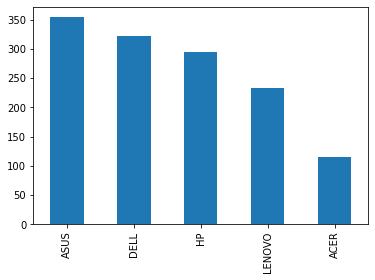

In [213]:
df['brand_name'].value_counts().head(5).plot(kind = 'bar')

<AxesSubplot:ylabel='brand_name'>

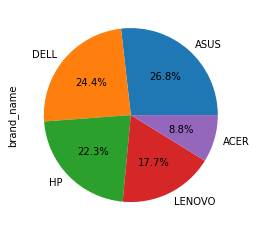

In [214]:
# Pie chart : 
df['brand_name'].value_counts().head(5).plot(kind = 'pie',autopct = '%0.1f%%')

The most available laptops are from ASUS 

- Model Name

In [215]:
df['model_name'].value_counts()

X           194
INSPIRON    143
IDEAPAD     113
VIVOBOOK    109
RYZEN       101
           ... 
PROBOOK       1
B50-70        1
SUMMIT        1
247           1
T14           1
Name: model_name, Length: 110, dtype: int64

<AxesSubplot:ylabel='model_name'>

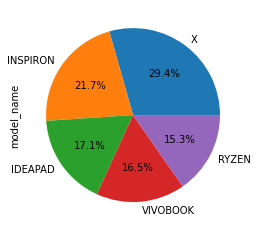

In [216]:
df['model_name'].value_counts().head(5).plot(kind = 'pie',autopct = '%0.1f%%')

- In our case None means laptops dont have a model name 
- Inspiron is the most availabe laptop in the market with ideapad being the second 
- Also,when we build our model we wont give the option to tell the name as it is easy to get the price if user has the complete name 

### Price Column - Univariate Analysis

In [217]:
# Price 
df['price'].describe()

count      1532.000000
mean      83735.552872
std       57260.625039
min           1.000000
25%       46792.500000
50%       64990.000000
75%       96410.000000
max      479990.000000
Name: price, dtype: float64

- We see the avg value is Rs 83,753 for laptops 
- We see an inaccuracte data point i.e min value to be Rs 1 

In [218]:
df[df['price'] == 1]

,brand_name,model_name,processor_brand,processor_model,processor_generation,price,ram_size,ram_type,ssd_size_gb,hdd_size_gb,display_size,operating_sys,warranty,touchscreen,graphics_size
1100,1,1,1,1,1.0,1,1,1,1,1,1.0,1,1.0,1,NaN
1114,1,1,1,1,1.0,1,1,1,1,1,1.0,1,1.0,1,NaN


In [219]:
# we remove these columns 
df = df.drop([1100,1114])

In [220]:
df['price'].describe()

count      1530.000000
mean      83845.009804
std       57217.870099
min       20990.000000
25%       46990.000000
50%       64990.000000
75%       96470.000000
max      479990.000000
Name: price, dtype: float64

- Now we see the prices being correct 

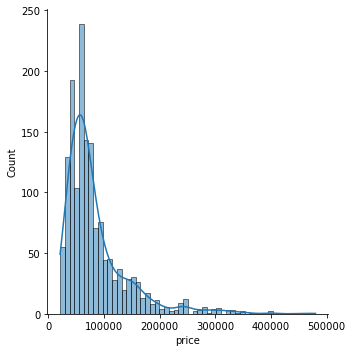

In [221]:
# Seeing the distribution:
sns.displot(kind='hist',data = df, x = 'price',kde = True)

- Clearly we see our data is skewed 

In [222]:
df['price'].skew()

2.3421752839697856

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

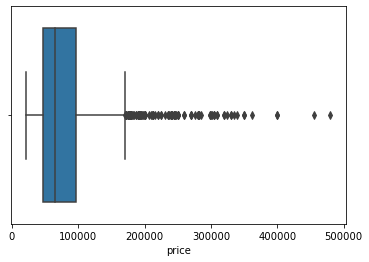

In [223]:
# Box plot :
sns.boxplot(df['price'])

In [224]:
# let us study a bit about high end devices i.e high prices and factors of it 
df[(df['price']>200000) & (df['brand_name'] =='APPLE')]

,brand_name,model_name,processor_brand,processor_model,processor_generation,price,ram_size,ram_type,ssd_size_gb,hdd_size_gb,display_size,operating_sys,warranty,touchscreen,graphics_size
5,APPLE,MACBOOK,APPLE,M2MAX,NaN,349900,32,Unified,1024,0,40.64,Mac,1.0,0,NaN
6,APPLE,MACBOOK,APPLE,M2MAX,NaN,349900,32,Unified,1024,0,40.64,Mac,1.0,0,NaN
10,APPLE,MACBOOK,APPLE,M1MAX,NaN,329900,32,Unified,1024,0,41.15,Mac,NaN,0,NaN
12,APPLE,MACBOOK,APPLE,M1MAX,NaN,319990,32,Unified,1024,0,41.15,Mac,NaN,0,NaN
14,APPLE,MACBOOK,APPLE,M2MAX,NaN,309900,32,Unified,1024,0,35.56,Mac,1.0,0,NaN
15,APPLE,MACBOOK,APPLE,M2MAX,NaN,309900,32,Unified,1024,0,35.56,Mac,1.0,0,NaN
31,APPLE,MACBOOK,APPLE,M2PRO,NaN,269900,16,Unified,1024,0,40.64,Mac,1.0,0,NaN
32,APPLE,MACBOOK,APPLE,M2PRO,NaN,269900,16,Unified,1024,0,40.64,Mac,1.0,0,NaN
33,APPLE,MACBOOK,APPLE,M1PRO,NaN,259900,16,Unified,1024,0,41.15,Mac,NaN,0,NaN
34,APPLE,MACBOOK,APPLE,M1PRO,NaN,259900,16,Unified,1024,0,41.15,Mac,NaN,0,NaN


In [225]:
df[(df['price']>100000)&(df['price']<200000)]

,brand_name,model_name,processor_brand,processor_model,processor_generation,price,ram_size,ram_type,ssd_size_gb,hdd_size_gb,display_size,operating_sys,warranty,touchscreen,graphics_size
69,ASUS,PROART,INTEL,COREI7,12.0,199990,16,DDR5,1024,0,40.64,Windows 11,1.0,0,NaN
70,APPLE,MACBOOK,APPLE,M2PRO,NaN,199900,16,Unified,512,0,35.56,Mac,1.0,0,NaN
71,HP,X,INTEL,COREI7,12.0,198990,32,DDR5,1024,0,43.94,Windows 11,1.0,0,8.0
72,ASUS,ZENBOOK,INTEL,COREI9,8.0,197990,16,DDR4,1024,0,NaN,Windows 10,NaN,0,4.0
73,MSI,GS66,INTEL,COREI7,11.0,195490,16,DDR4,1024,0,39.62,Windows 10,NaN,0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,DELL,XPS,INTEL,COREI5,11.0,103890,8,LPDDR4X,512,0,33.78,Windows 10,NaN,0,NaN
351,ASUS,ROG,AMD,RYZEN7,NaN,103500,16,DDR5,512,0,39.62,Windows 11,NaN,0,NaN
352,HP,HP,AMD,RYZEN7,NaN,103500,16,DDR4,1024,0,33.78,Windows 11,1.0,1,NaN
353,DELL,X,INTEL,COREI7,NaN,103490,16,DDR4,512,0,NaN,Windows 11,NaN,0,4.0


### Insights on Price : 
- Data consists outliers 
- Data is skewed 
- AS we see that laptops that have a price greater than 2,00,000 have almost the same features but the difference in price is due to the graphic card that they have 

- The brand name apple justifies the price being high which is present in our dataset 

- The high prices of the laptops are due to them having an high end processor and an having high graphics size  

### Processor brand :


In [226]:
df['processor_brand'].value_counts()

INTEL       1029
AMD          453
APPLE         45
MEDIATEK       2
QUALCOMM       1
Name: processor_brand, dtype: int64

<AxesSubplot:ylabel='processor_brand'>

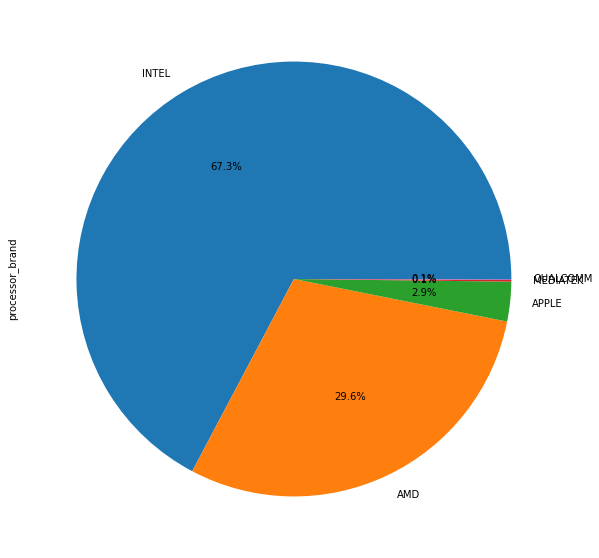

In [227]:
df['processor_brand'].value_counts().head(5).plot(kind = 'pie',autopct = '%0.1f%%',figsize=(10, 10))

In [228]:
df['processor_brand'].isnull().sum()

0

### Insights on Processor_brand : 
Most laptops available are using INTEL processors 
The second most used processor is AMD 

### Processor model :


In [229]:
df['processor_model'].isnull().sum()

3

In [230]:
# We have 3 null values 
df[df['processor_model'].isna()]
# we might impute this later 

,brand_name,model_name,processor_brand,processor_model,processor_generation,price,ram_size,ram_type,ssd_size_gb,hdd_size_gb,display_size,operating_sys,warranty,touchscreen,graphics_size
1025,DELL,INSPIRON,INTEL,NaN,NaN,32000,8,DDR4,256,0,NaN,Windows 11,NaN,0,NaN
1045,DELL,INSPIRON,AMD,NaN,NaN,34490,8,DDR4,256,0,NaN,Windows 11,NaN,0,NaN
1084,DELL,INSPIRON,AMD,NaN,NaN,36990,8,DDR4,256,0,NaN,Windows 11,NaN,0,NaN


<AxesSubplot:ylabel='processor_model'>

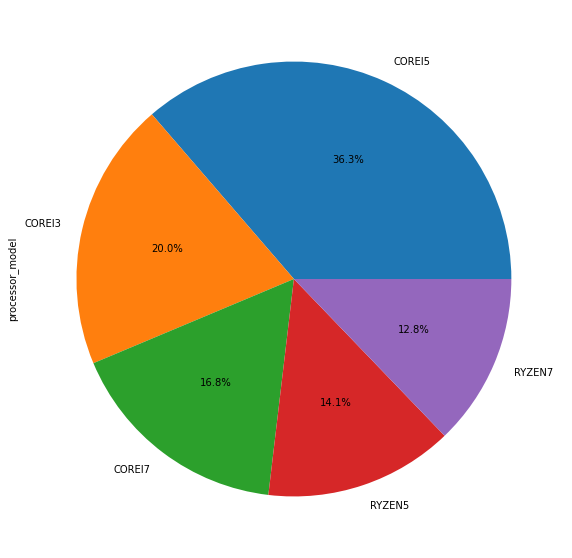

In [231]:
df['processor_model'].value_counts().head(5).plot(kind = 'pie',autopct = '%0.1f%%',figsize=(10, 10))

### Insights on Processor_model : 
- Processor model are almost a equal share with Most laptop having CORE i5
- CORE I3 is not available in lesser phones 

## Ram size

In [232]:
df['ram_size'].isnull().sum()

0

<AxesSubplot:ylabel='ram_size'>

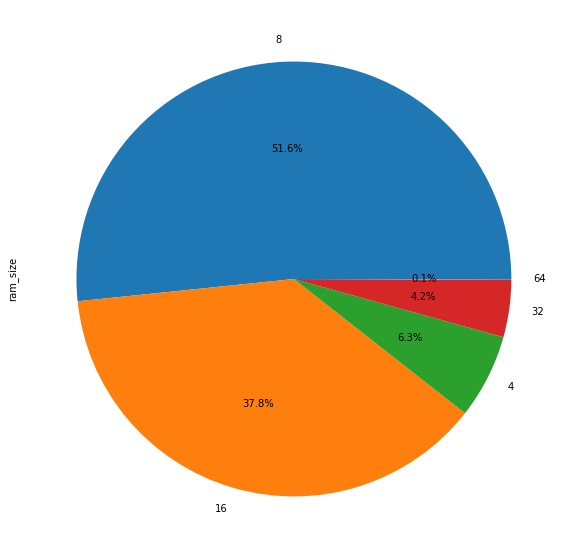

In [233]:
df['ram_size'].value_counts().plot(kind = 'pie',autopct = '%0.1f%%',figsize=(10, 10))

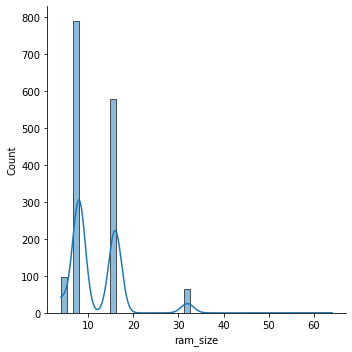

In [234]:
sns.displot(kind='hist',data = df, x = 'ram_size',kde = True)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ram_size'>

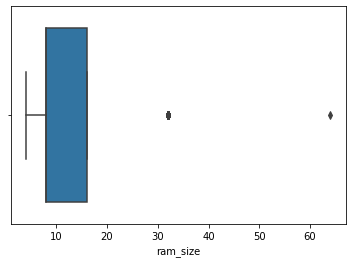

In [235]:
sns.boxplot(df['ram_size'])

### Insights on Ram_size : 
- Most laptops have a ram of size 8 
- Distribution is trimodal with three peaks being 8,16,32 

## Ram type

In [236]:
df['ram_type'].isnull().sum()

0

<AxesSubplot:ylabel='ram_type'>

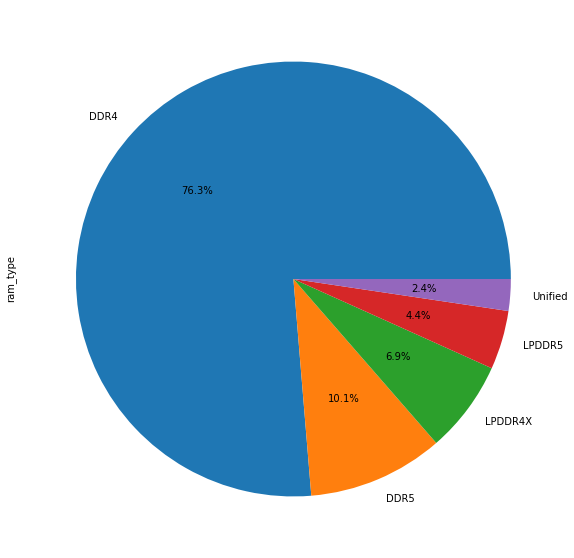

In [237]:
df['ram_type'].value_counts().head(5).plot(kind = 'pie',autopct = '%0.1f%%',figsize=(10, 10))

### Insights on Ram_type : 
- Most laptops are having a DDR4 Ram 

## SSD size


In [238]:
df['ssd_size_gb'].isnull().sum()

0

<AxesSubplot:ylabel='ssd_size_gb'>

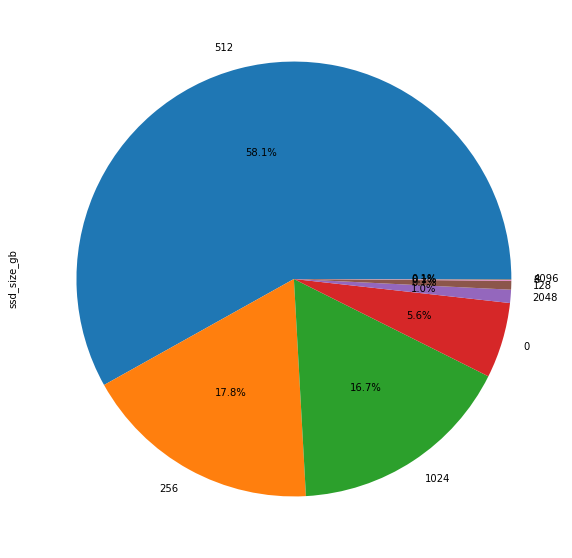

In [239]:
df['ssd_size_gb'].value_counts().plot(kind = 'pie',autopct = '%0.1f%%',figsize=(10, 10))

### Insights on SSD_size : 
- Most laptops are having an SSD of 512 GB 

## HDD size


In [240]:
df['hdd_size_gb'].isnull().sum()

0

<AxesSubplot:ylabel='hdd_size_gb'>

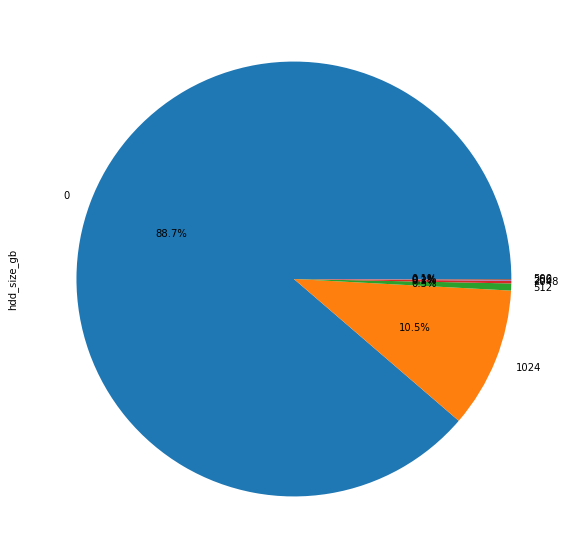

In [241]:
df['hdd_size_gb'].value_counts().plot(kind = 'pie',autopct = '%0.1f%%',figsize=(10, 10))

### Insights on hdd_size : 
- Very few laptop are having an hdd
- 89 % of laptops dont have hdd's in them 
- 10 % of laptops have an 1 TB ssd 

### Display size : 

In [242]:
df['display_size'].value_counts()

39.62     724
35.56     401
33.78      76
40.64      75
40.89      41
43.94      36
34.04      21
34.54      16
38.10      14
96.52      11
38.00       9
41.15       6
35.81       6
36.83       6
34.29       5
33.02       3
43.18       3
103.23      3
88.90       2
36.07       2
38.86       2
25.65       1
29.46       1
45.72       1
100.63      1
30.48       1
30.99       1
42.16       1
Name: display_size, dtype: int64

<AxesSubplot:ylabel='operating_sys'>

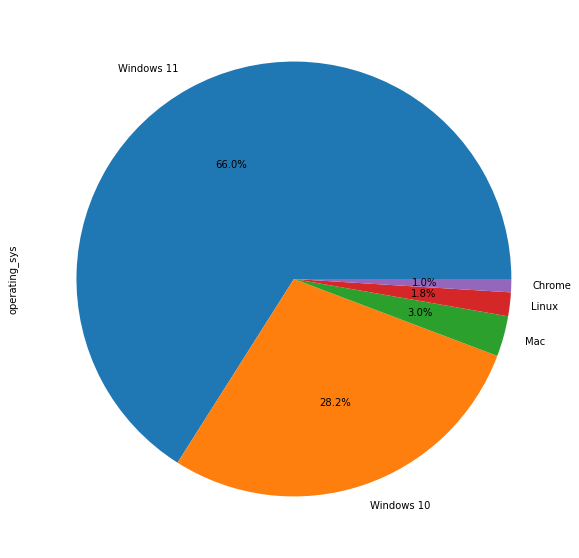

In [243]:
df['operating_sys'].value_counts().plot(kind = 'pie',autopct = '%0.1f%%',figsize=(10, 10))

<AxesSubplot:>

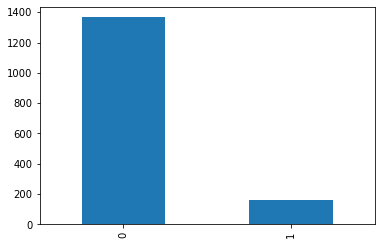

In [244]:
df['touchscreen'].value_counts().head(5).plot(kind = 'bar')

<AxesSubplot:>

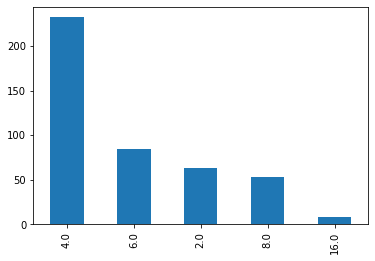

In [245]:
df['graphics_size'].value_counts().head(5).plot(kind = 'bar')

### Insights on graphics_size , touchscreen , operating sys 
- Very less laptops have 16 gb graphics size 
- The laptops with a graphics card have 4g graphics card prominently 

- Almost 90 % of the laptops are not touchscreen 

- 66% Laptops have Windows 11 Opearting system 

In [246]:
df['warranty'].value_counts()

1.0    743
3.0     53
2.0     50
0.0     26
1.5      5
Name: warranty, dtype: int64

<AxesSubplot:>

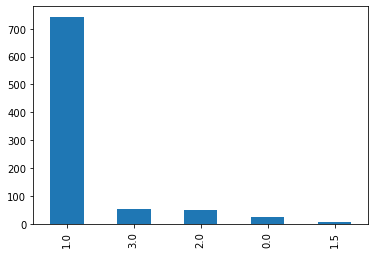

In [247]:
df['warranty'].value_counts().head(5).plot(kind = 'bar')

### Distribution of Numerical columns : 


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1530 entries, 0 to 1531
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand_name            1530 non-null   object 
 1   model_name            1530 non-null   object 
 2   processor_brand       1530 non-null   object 
 3   processor_model       1527 non-null   object 
 4   processor_generation  1000 non-null   float64
 5   price                 1530 non-null   int32  
 6   ram_size              1530 non-null   int32  
 7   ram_type              1530 non-null   object 
 8   ssd_size_gb           1530 non-null   int32  
 9   hdd_size_gb           1530 non-null   int32  
 10  display_size          1469 non-null   float64
 11  operating_sys         1530 non-null   object 
 12  warranty              877 non-null    float64
 13  touchscreen           1530 non-null   int16  
 14  graphics_size         445 non-null    float64
dtypes: float64(4), int16(

In [249]:
nums_cols = df.select_dtypes(include=['float64','int32','int16'])
nums_cols

,processor_generation,price,ram_size,ssd_size_gb,hdd_size_gb,display_size,warranty,touchscreen,graphics_size
0,NaN,479990,32,2048,0,40.64,1.0,0,16.0
1,NaN,455990,32,2048,0,40.64,1.0,0,12.0
2,13.0,399990,32,2048,0,43.18,2.0,0,12.0
3,12.0,399990,32,4096,0,43.94,1.0,0,NaN
4,NaN,361990,32,2048,0,40.64,1.0,0,NaN
...,...,...,...,...,...,...,...,...,...
1527,12.0,59990,8,512,0,39.62,1.0,0,NaN
1528,NaN,59990,8,512,0,39.62,1.0,0,NaN
1529,NaN,59990,8,1024,0,40.64,1.0,0,NaN
1530,11.0,59990,8,256,1024,39.62,1.0,0,NaN


In [250]:
nums_cols = nums_cols.iloc[:,[4,5,6,7,8]]


In [251]:
nums_cols

,hdd_size_gb,display_size,warranty,touchscreen,graphics_size
0,0,40.64,1.0,0,16.0
1,0,40.64,1.0,0,12.0
2,0,43.18,2.0,0,12.0
3,0,43.94,1.0,0,NaN
4,0,40.64,1.0,0,NaN
...,...,...,...,...,...
1527,0,39.62,1.0,0,NaN
1528,0,39.62,1.0,0,NaN
1529,0,40.64,1.0,0,NaN
1530,1024,39.62,1.0,0,NaN


In [252]:
def plot_graph(col_name):
    sns.displot(kind = 'hist', kde = True, data = df , x = col_name, label = col_name)
    sns.catplot(kind = 'box',data = df , x = col_name)
    
    

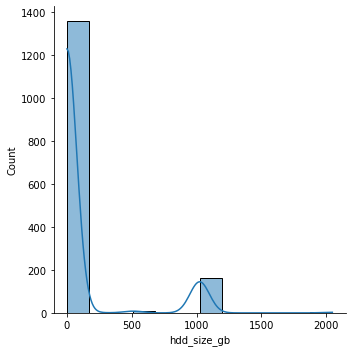

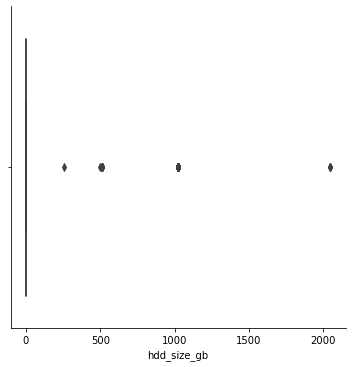

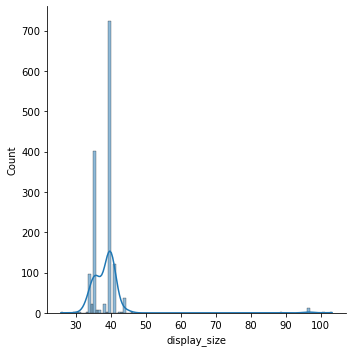

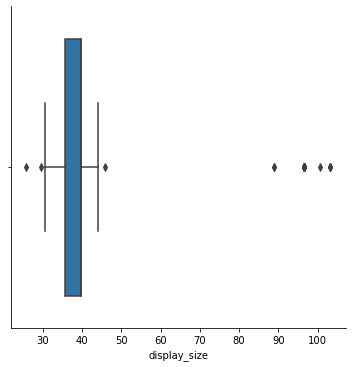

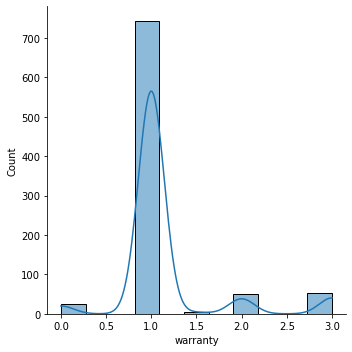

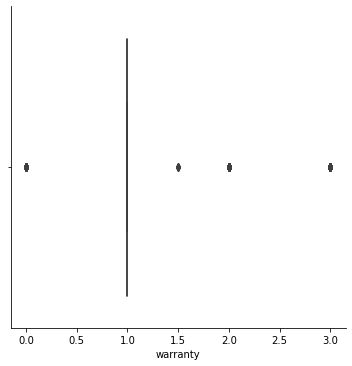

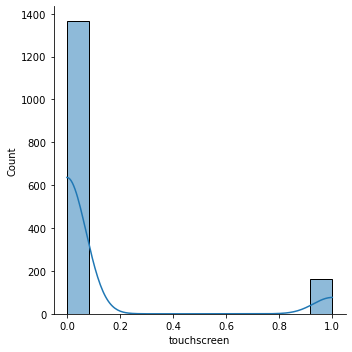

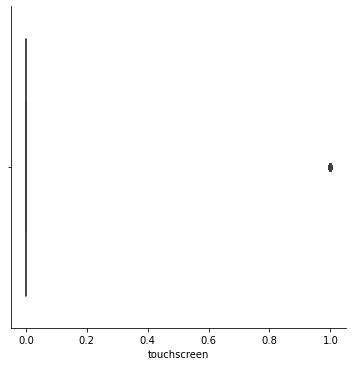

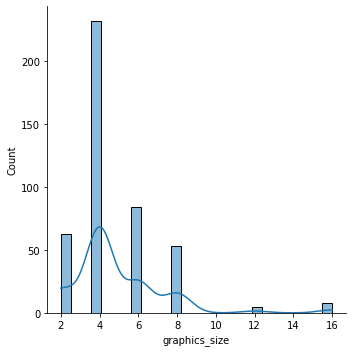

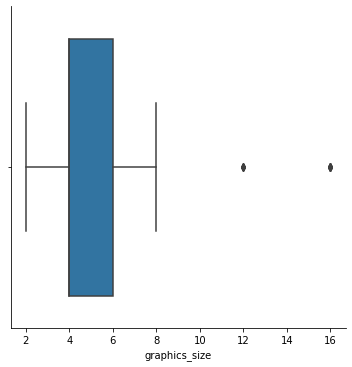

In [253]:
for col in nums_cols:
    plot_graph(col)

## Bivariate analysis

In [254]:
df.sample(5)

,brand_name,model_name,processor_brand,processor_model,processor_generation,price,ram_size,ram_type,ssd_size_gb,hdd_size_gb,display_size,operating_sys,warranty,touchscreen,graphics_size
344,HP,VICTUS,AMD,RYZEN7,NaN,104500,16,DDR4,512,0,40.89,Windows 11,1.0,0,6.0
1397,LENOVO,RYZEN,AMD,RYZEN5,5.0,54000,8,DDR4,512,0,39.62,Windows 11,1.0,0,NaN
1387,ASUS,VIVOBOOK,INTEL,COREI5,11.0,53800,8,LPDDR4X,512,0,33.78,Windows 10,NaN,0,NaN
1064,LENOVO,V15,INTEL,COREI3,10.0,35500,4,DDR4,0,1024,39.62,Linux,1.0,0,NaN
1334,ASUS,VIVOBOOK,AMD,RYZEN3,NaN,47990,8,LPDDR5,512,0,39.62,Windows 11,1.0,0,NaN


### Price vs Other columns 

#### Brand Name vs Price 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'ASUS'),
  Text(1, 0, 'MSI'),
  Text(2, 0, 'APPLE'),
  Text(3, 0, 'DELL'),
  Text(4, 0, 'HP'),
  Text(5, 0, 'LENOVO'),
  Text(6, 0, 'ACER'),
  Text(7, 0, 'GIGABYTE'),
  Text(8, 0, 'MICROSOFT'),
  Text(9, 0, 'INFINIX'),
  Text(10, 0, 'SAMSUNG'),
  Text(11, 0, 'LG'),
  Text(12, 0, 'AVITA'),
  Text(13, 0, 'VAIO'),
  Text(14, 0, 'REDMIBOOK'),
  Text(15, 0, 'NOKIA'),
  Text(16, 0, 'REALME'),
  Text(17, 0, 'SMARTRON'),
  Text(18, 0, 'MI')])

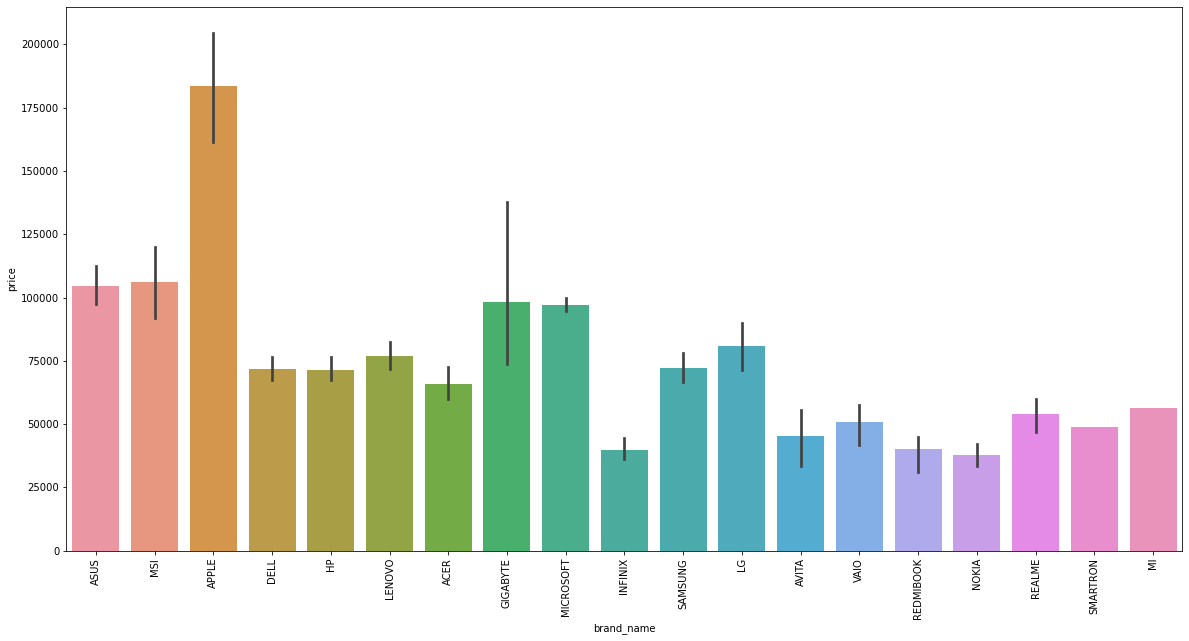

In [255]:
# Barplot 
plt.figure(figsize=(20,10))
sns.barplot(data = df , x = 'brand_name',y = 'price')
plt.xticks(rotation = 'vertical')

### Insights for brand_name vs price : 
- We see that on an average Apple laptops are having a high price 
- This means that brand_name does have an effect on price 

#### Model Name vs Price 

In [263]:
# Barplot 
# As there are many categories for model_name we take only those models who have more than 40 laptops 
x = df.groupby('model_name').count()['brand_name']
x

model_name
 MACBOOK       40
(2022)          1
14S            13
15              2
15-EC1105AX     3
               ..
XPS             5
YOGA           20
ZENBOOK        33
ZEPHYRUS        1
ZERO            1
Name: brand_name, Length: 109, dtype: int64

In [264]:
temp_df = df[df['model_name'].isin(x[x>40].index)]
temp_df

,brand_name,model_name,processor_brand,processor_model,processor_generation,price,ram_size,ram_type,ssd_size_gb,hdd_size_gb,display_size,operating_sys,warranty,touchscreen,graphics_size
0,ASUS,ROG,AMD,RYZEN9,NaN,479990,32,DDR5,2048,0,40.64,Windows 11,1.0,0,16.0
1,ASUS,ROG,AMD,RYZEN9,NaN,455990,32,DDR5,2048,0,40.64,Windows 11,1.0,0,12.0
2,MSI,X,INTEL,COREI9,13.0,399990,32,DDR5,2048,0,43.18,Windows 11,2.0,0,12.0
3,ASUS,ROG,INTEL,COREI9,12.0,399990,32,DDR5,4096,0,43.94,Windows 11,1.0,0,NaN
4,ASUS,ROG,AMD,RYZEN9,NaN,361990,32,DDR5,2048,0,40.64,Windows 11,1.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,HP,PAVILION,AMD,RYZEN5,NaN,59990,16,DDR4,512,0,35.56,Windows 11,1.0,0,NaN
1527,SAMSUNG,X,INTEL,COREI5,12.0,59990,8,DDR4,512,0,39.62,Windows 11,1.0,0,NaN
1528,ASUS,VIVOBOOK,AMD,RYZEN5,NaN,59990,8,LPDDR5,512,0,39.62,Windows 11,1.0,0,NaN
1529,ASUS,VIVOBOOK,AMD,RYZEN5,NaN,59990,8,DDR4,1024,0,40.64,Windows 11,1.0,0,NaN


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'ROG'),
  Text(1, 0, 'X'),
  Text(2, 0, 'RYZEN'),
  Text(3, 0, 'IDEAPAD'),
  Text(4, 0, 'INSPIRON'),
  Text(5, 0, 'VIVOBOOK'),
  Text(6, 0, 'PAVILION'),
  Text(7, 0, 'ASPIRE')])

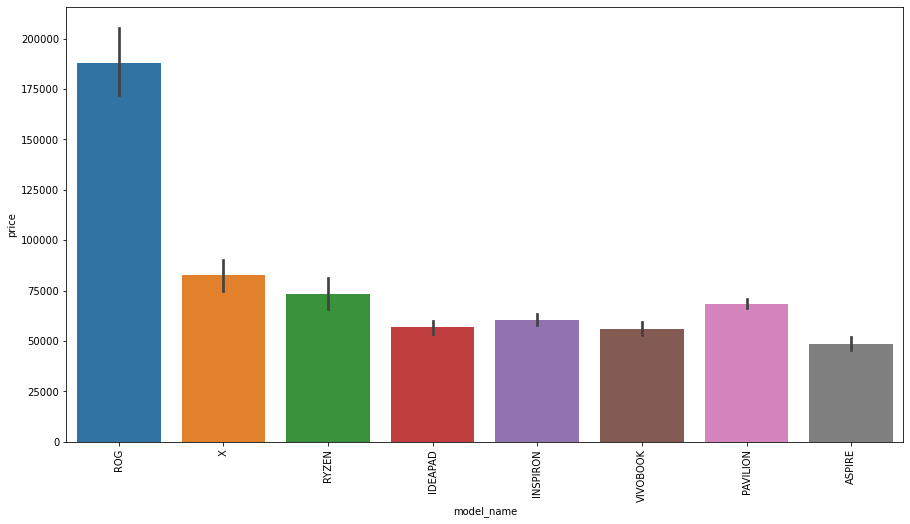

In [265]:
plt.figure(figsize=(15,8))
sns.barplot(data = temp_df , x = 'model_name',y = 'price')
plt.xticks(rotation = 'vertical')

### Insights for model_name vs price : 
- We see that on an average ROG laptops have an higher price 
- This means that model_name does have an effect on price 

## Plotting bar chart for remaining categorical column vs Price 

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1530 entries, 0 to 1531
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand_name            1530 non-null   object 
 1   model_name            1530 non-null   object 
 2   processor_brand       1530 non-null   object 
 3   processor_model       1527 non-null   object 
 4   processor_generation  1000 non-null   float64
 5   price                 1530 non-null   int32  
 6   ram_size              1530 non-null   int32  
 7   ram_type              1530 non-null   object 
 8   ssd_size_gb           1530 non-null   int32  
 9   hdd_size_gb           1530 non-null   int32  
 10  display_size          1469 non-null   float64
 11  operating_sys         1530 non-null   object 
 12  warranty              877 non-null    float64
 13  touchscreen           1530 non-null   int16  
 14  graphics_size         445 non-null    float64
dtypes: float64(4), int16(

In [277]:
# For all the Categorical Columns vs price columns : Bar graphs : 

def plot_bar(x):
    plt.figure(figsize=(20,10))
    sns.barplot(data = df , x = x , y = 'price')
    plt.xticks(rotation = 'vertical')


categorical_cols = df.select_dtypes(include = 'object')


    

In [278]:
categorical_cols

,brand_name,model_name,processor_brand,processor_model,ram_type,operating_sys
0,ASUS,ROG,AMD,RYZEN9,DDR5,Windows 11
1,ASUS,ROG,AMD,RYZEN9,DDR5,Windows 11
2,MSI,X,INTEL,COREI9,DDR5,Windows 11
3,ASUS,ROG,INTEL,COREI9,DDR5,Windows 11
4,ASUS,ROG,AMD,RYZEN9,DDR5,Windows 11
...,...,...,...,...,...,...
1527,SAMSUNG,X,INTEL,COREI5,DDR4,Windows 11
1528,ASUS,VIVOBOOK,AMD,RYZEN5,LPDDR5,Windows 11
1529,ASUS,VIVOBOOK,AMD,RYZEN5,DDR4,Windows 11
1530,DELL,X,INTEL,COREI5,DDR4,Windows 11


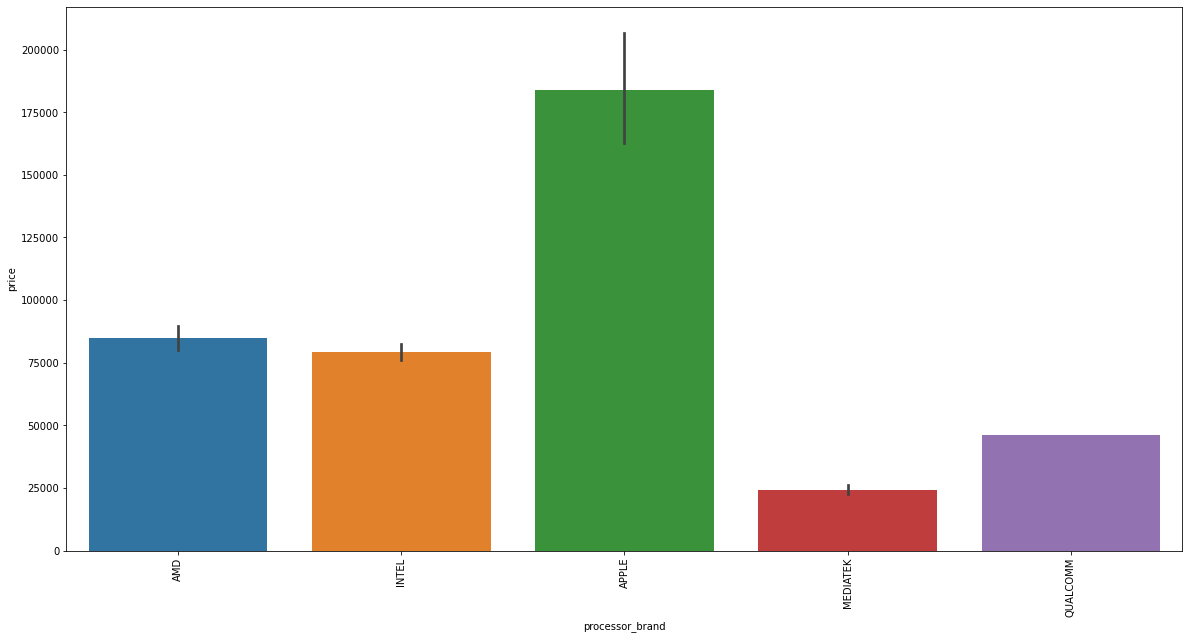

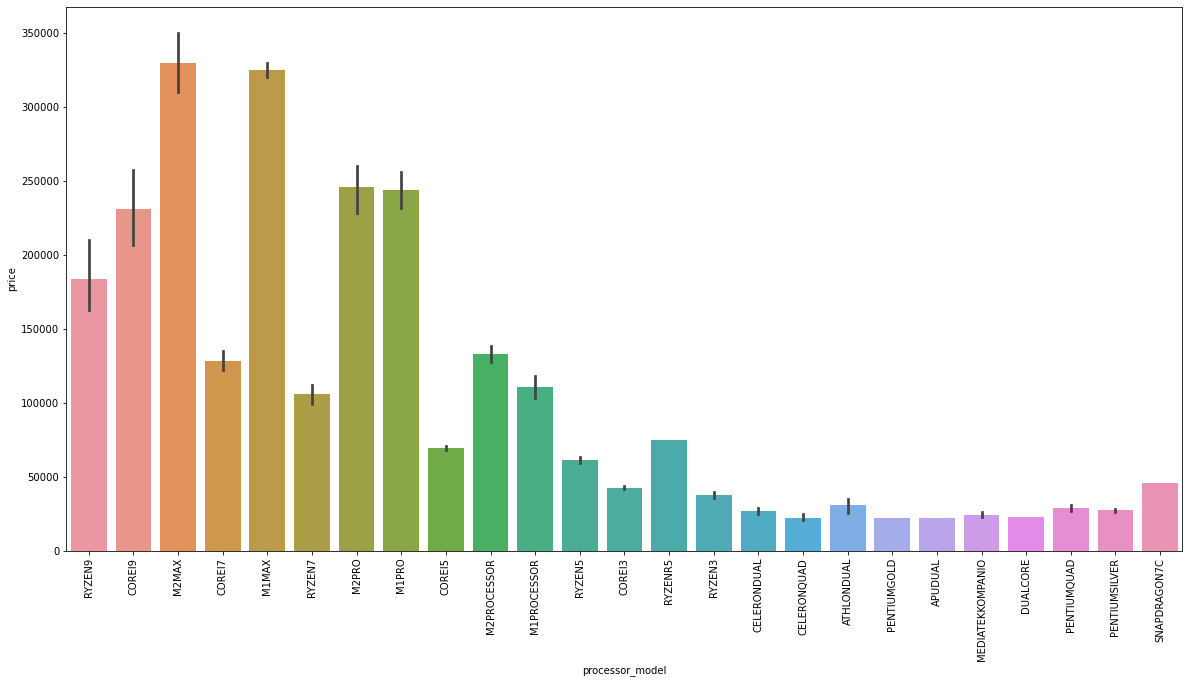

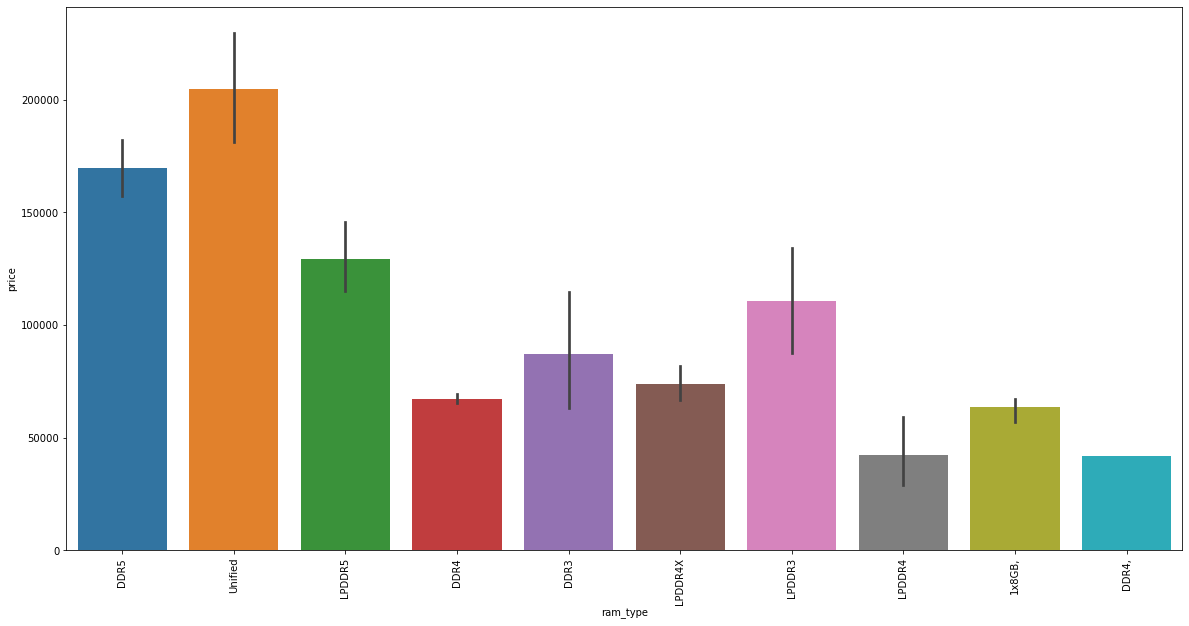

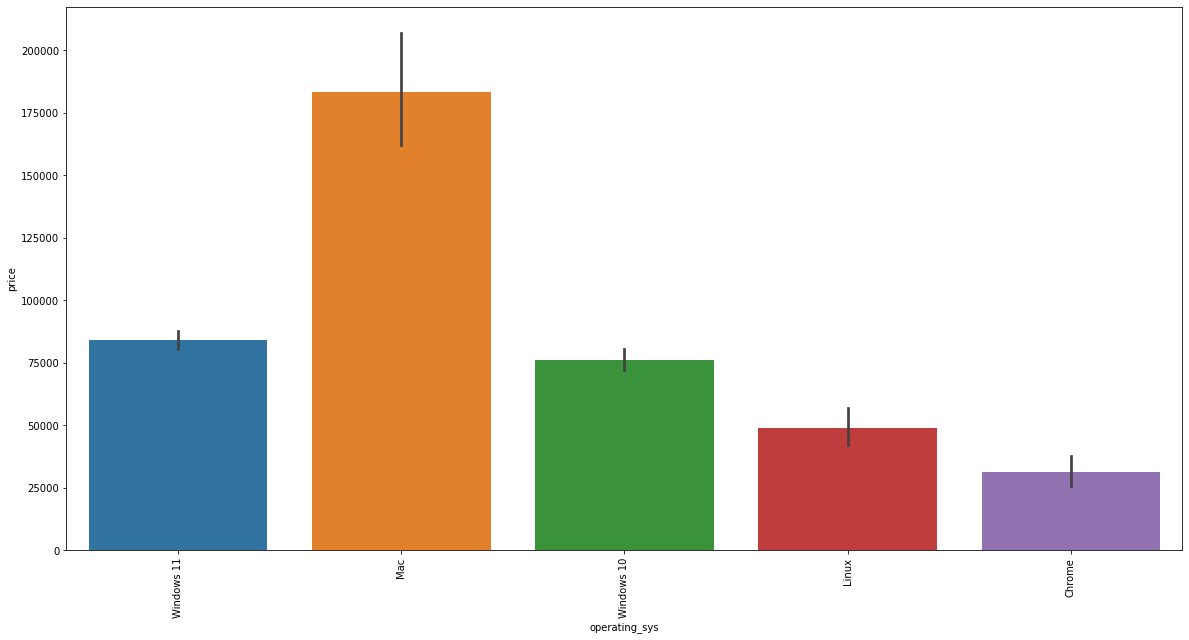

In [279]:
categorical_cols = categorical_cols.iloc[:,[2,3,4,5]]

for col in categorical_cols:
    plot_bar(col)

### Touchscreen vs Price 

<AxesSubplot:xlabel='touchscreen', ylabel='price'>

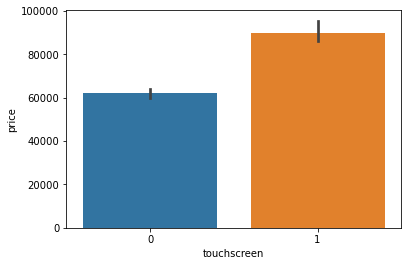

In [281]:
sns.barplot(data= df , x = 'touchscreen', y = 'price',estimator= np.median)






### Insights for price processor_brand , processor_model , ram_type, operating_sys

 

### Processor_brand vs Price :
- APPLE Processors lead to a high price  


### Procesor_model vs Price :
- Apple's M2 Processors  model lead to a high price 

### Ram_type vs Price 
- Unified RAM Type results in an higher average price 

### Opearting System vs Price 
- Operating System that has MAC has an higher average price 

### Touchscreen vs Price 
- Having touchscreen increases the average price by 20,000 . Hence we should consider this factor

## Price vs All Numerical Columns 


### Plotting scatter plot for Price vs All Numerical columns 



In [287]:
numerical_cols = df.select_dtypes(include= ['int32','int16','float64'])
numerical_cols

,processor_generation,price,ram_size,ssd_size_gb,hdd_size_gb,display_size,warranty,touchscreen,graphics_size
0,NaN,479990,32,2048,0,40.64,1.0,0,16.0
1,NaN,455990,32,2048,0,40.64,1.0,0,12.0
2,13.0,399990,32,2048,0,43.18,2.0,0,12.0
3,12.0,399990,32,4096,0,43.94,1.0,0,NaN
4,NaN,361990,32,2048,0,40.64,1.0,0,NaN
...,...,...,...,...,...,...,...,...,...
1527,12.0,59990,8,512,0,39.62,1.0,0,NaN
1528,NaN,59990,8,512,0,39.62,1.0,0,NaN
1529,NaN,59990,8,1024,0,40.64,1.0,0,NaN
1530,11.0,59990,8,256,1024,39.62,1.0,0,NaN


In [288]:
numerical_cols = numerical_cols.drop('price',axis = 1 )
numerical_cols

,processor_generation,ram_size,ssd_size_gb,hdd_size_gb,display_size,warranty,touchscreen,graphics_size
0,NaN,32,2048,0,40.64,1.0,0,16.0
1,NaN,32,2048,0,40.64,1.0,0,12.0
2,13.0,32,2048,0,43.18,2.0,0,12.0
3,12.0,32,4096,0,43.94,1.0,0,NaN
4,NaN,32,2048,0,40.64,1.0,0,NaN
...,...,...,...,...,...,...,...,...
1527,12.0,8,512,0,39.62,1.0,0,NaN
1528,NaN,8,512,0,39.62,1.0,0,NaN
1529,NaN,8,1024,0,40.64,1.0,0,NaN
1530,11.0,8,256,1024,39.62,1.0,0,NaN


In [289]:
numerical_cols = numerical_cols.drop('processor_generation', axis = 1)

In [290]:
numerical_cols

,ram_size,ssd_size_gb,hdd_size_gb,display_size,warranty,touchscreen,graphics_size
0,32,2048,0,40.64,1.0,0,16.0
1,32,2048,0,40.64,1.0,0,12.0
2,32,2048,0,43.18,2.0,0,12.0
3,32,4096,0,43.94,1.0,0,NaN
4,32,2048,0,40.64,1.0,0,NaN
...,...,...,...,...,...,...,...
1527,8,512,0,39.62,1.0,0,NaN
1528,8,512,0,39.62,1.0,0,NaN
1529,8,1024,0,40.64,1.0,0,NaN
1530,8,256,1024,39.62,1.0,0,NaN


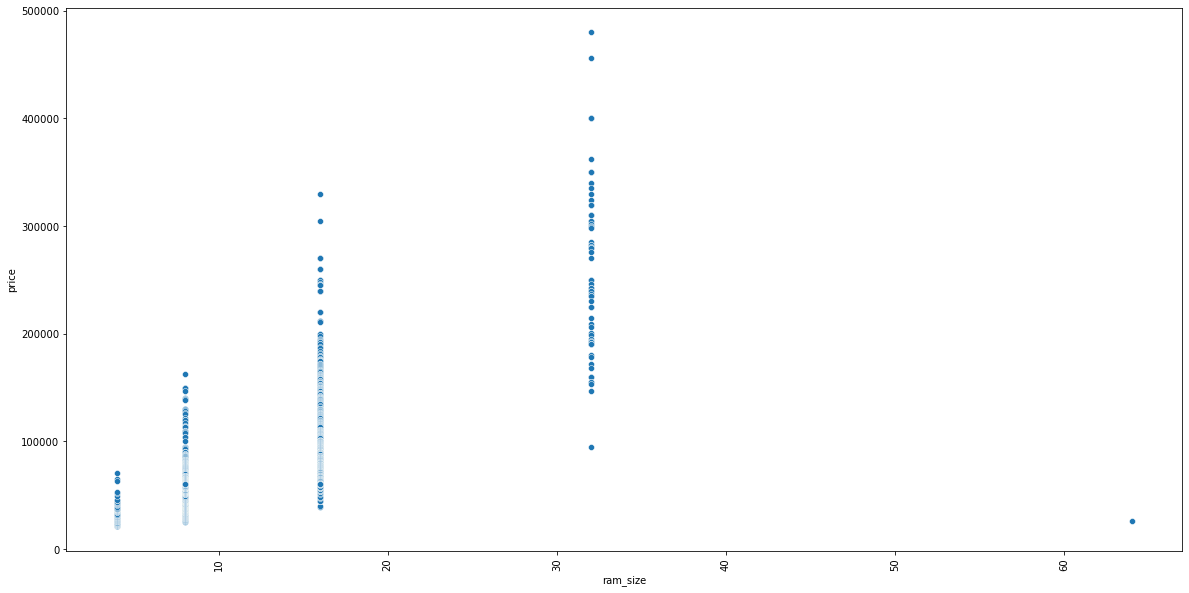

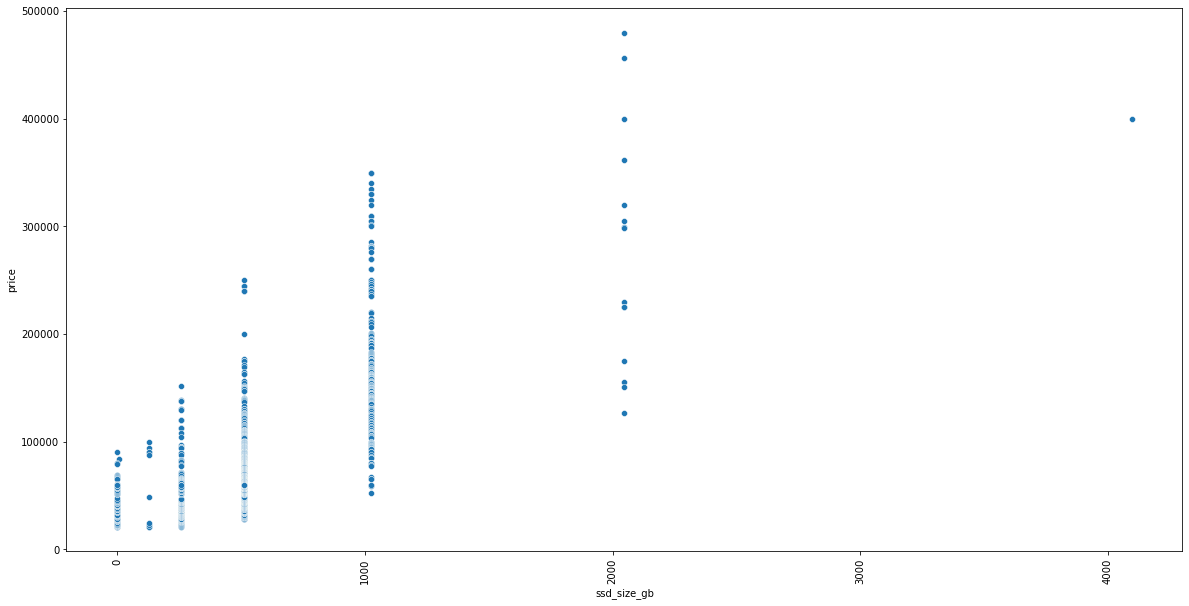

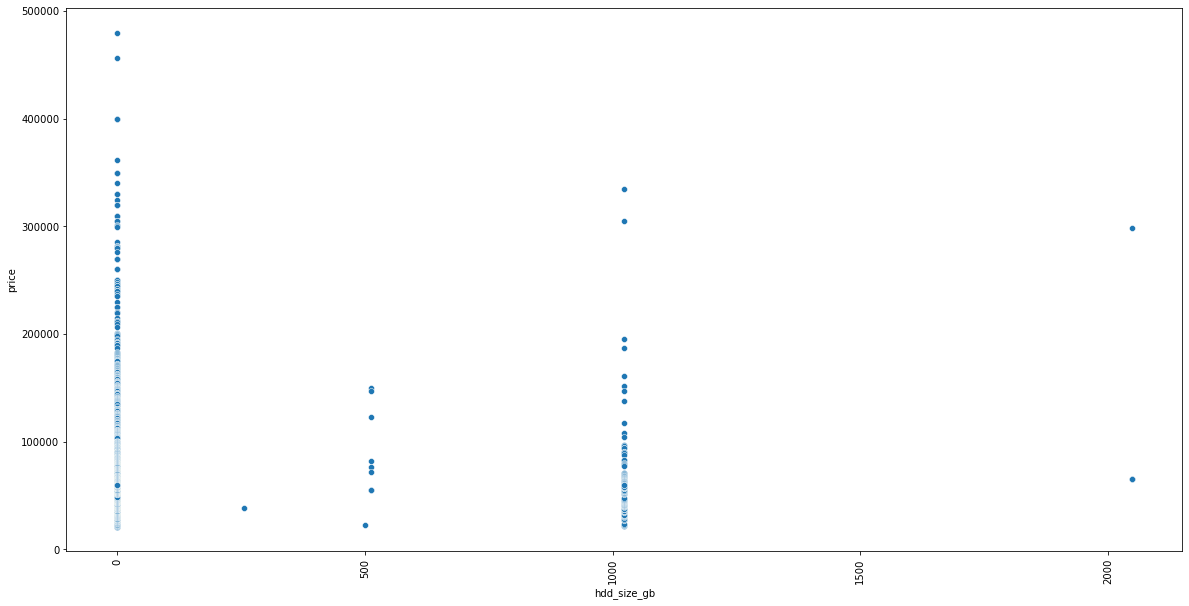

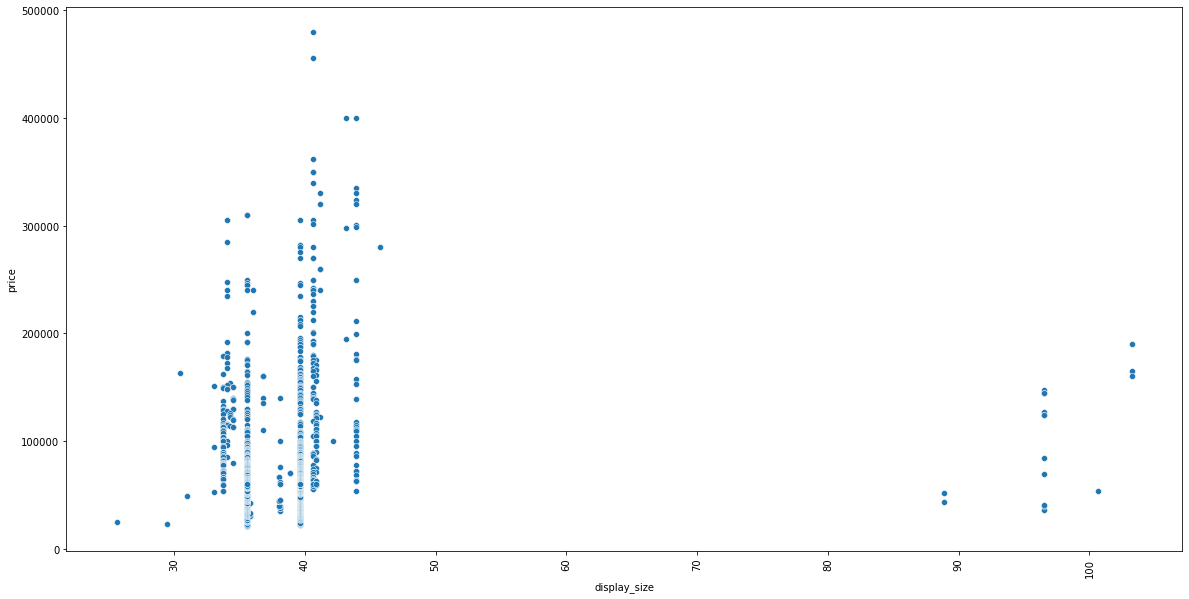

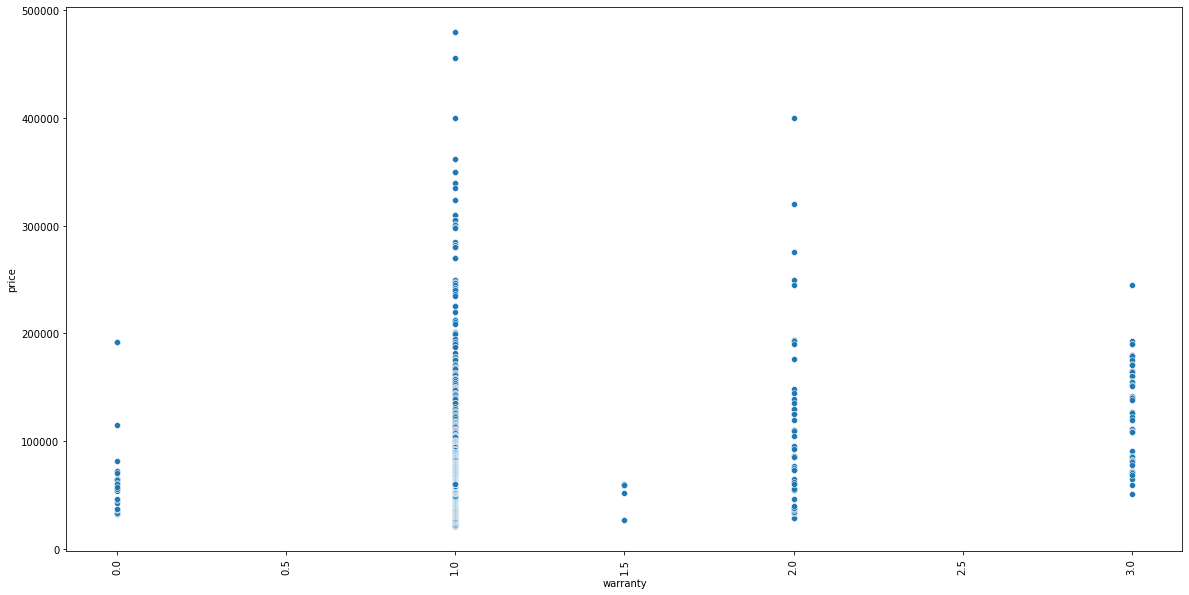

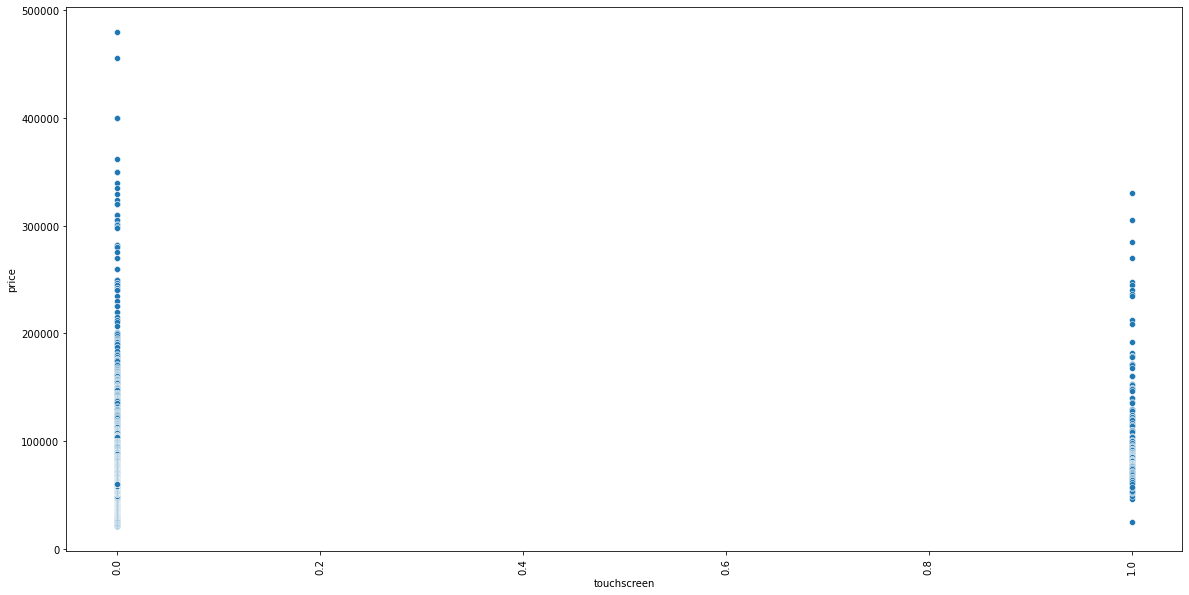

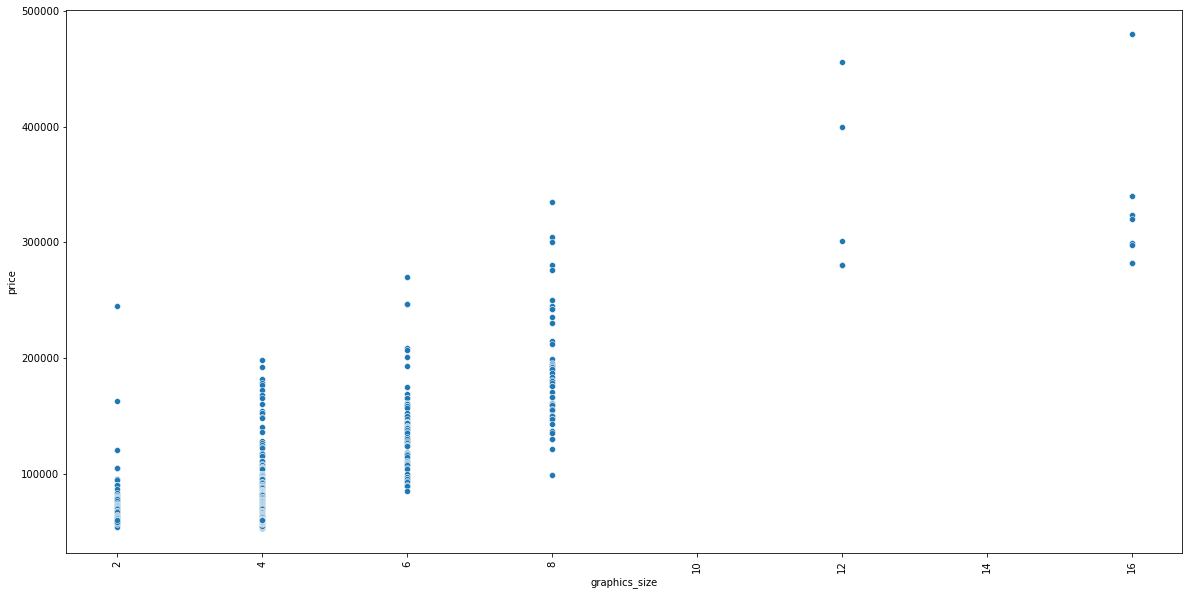

In [293]:
def plot_scatter(x):
    plt.figure(figsize=(20,10))
    sns.scatterplot(data = df , x = x , y = 'price')
    plt.xticks(rotation = 'vertical')

    
for cols in numerical_cols:
    plot_scatter(cols)

### Insights for price vs  ram_size , ssd_size , hdd_size, graphics_size

- As we know that for these numerical columns can be called kind of categorical , hence we get these kind of scatter plot  

### Ram_size vs Price :
- More the ram size , price is increasing  

### SSD_size vs Price :
- More the SSD size , the higher the price goes 

### hdd_size vs Price 
- Even not having an hdd , i.e 0 , can also lead to an high price 

### graphics_size vs Price 
- graphics size for more than 12 seems to be having higher price  


### Multivariate Analysis : 

#### SSD_size , HDD_size , Price 

In [299]:
import plotly.express as px

# Create the scatter plot using plotly express
fig = px.scatter_3d(df, x='ssd_size_gb', y='hdd_size_gb', z='price', color='price', hover_data=['price'])

# Show the plot
fig.show()

### Insights : 
We see that higher price range laptops only contain ssd with a higher capacity and no hdd


## All insights from EDA that will help in preprocessing : 

**Model name**: None means laptops don't have a model name. When building the model, don't give the option to input model name, as the complete name is not necessary for predicting price.

**Brand name**: The brand name has an impact on price. On average, Apple laptops have a higher price.

**Processor brand and model**: The most commonly used processors are Intel and AMD. The processor model has an impact on price, with Apple's M2 processor model leading to a higher price.

**RAM size**: Most laptops have a RAM size of 8, and the distribution is trimodal with peaks at 8, 16, and 32. RAM size has a positive impact on price.

**SSD size**: Most laptops have an SSD size of 512 GB. SSD size has a positive impact on price.

**HDD size**: Most laptops do not have an HDD, and having an HDD does not necessarily increase the price. Only 10% of laptops have a 1 TB SSD.

**Graphics size**: Laptops with a graphics card have 4GB graphics card prominently. Very few laptops have a graphics size of 16GB, and graphics size for more than 12 seems to be associated with a higher price.

**Touchscreen**: Almost 90% of laptops do not have a touchscreen, but having a touchscreen increases the average price by 20,000.

**Operating system**: Windows 11 is the most commonly used operating system, and having a MAC operating system is associated with a higher price.



**Processor_brand vs Price**: Apple Processors lead to a high price.

**Processor_model vs Price**: Apple's M2 Processors lead to a high price.

**Ram_type vs Price**: Unified RAM Type results in a higher average price.

**Operating System vs Price**: An Operating System that has MAC has a higher average price.

**Touchscreen vs Price**: Having a touchscreen increases the average price by 20,000.

**Ram_size vs Price**: More the ram size, the higher the price is increasing.

**SSD_size vs Price**: More the SSD size, the higher the price goes.

**HDD_size vs Price**: Even not having an HDD, i.e. 0, can also lead to a high price.

**Graphics_size vs Price**: Graphics size more than 12 seems to have a higher price.


Laptops with prices greater than 2,00,000 have almost the same features, but the difference in price is due to the graphics card they have.

The high prices of laptops are due to them having a high-end processor and a high graphics size.

Brand name justifies the price being high, which is present in our dataset.

ROG laptops have a higher price on average. This means that model_name does have an effect on price.

On average, Apple laptops have a higher price. This means that brand_name does have an effect on price.

Most laptops have a RAM of size 8. The distribution is trimodal, with three peaks being 8, 16, and 32.

Most laptops are having an SSD of 512 GB.

Very few laptops are having an HDD. 89% of laptops don't have HDDs in them. 10% of laptops have a 1TB SSD.

Very few laptops have a graphics size of 16 GB. The laptops with a graphics card have 4GB graphics card prominently. Almost 90% of the laptops are not touchscreen. 66% of laptops have Windows 11 Operating System.

